In [1]:
# Import the required libraries and modules
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor as MPLR

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel("EC-AOP.xlsx")
# Define the features (independent variables)
features = ['EC-C', 'BC-C', 'PMS-C', 'pH', 'Bio', 'T','O/C','Id/Ig', 'SSA','HN','Gap','VIP']
# Extract the feature matrix X and the target variable y
X = df[features]
y = np.log10(df["K"])

In [3]:
def prediction(X,y,model,title):
    
    # Model training
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=20)
    model.fit(train_x,train_y)
    train_y_predicted = model.predict(train_x)
    test_y_predicted = model.predict(test_x)
    print("Train R2= %.3f"%model.score(train_x,train_y))
    print("Train RMSE: %.3f"% sqrt(mean_squared_error(train_y, train_y_predicted)))
    print("Test R2= %.3f"%model.score(test_x,test_y))
    print("Test RMSE: %.3f"% sqrt(mean_squared_error(test_y, test_y_predicted)))
    
    # plot
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 24
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color'] = 'black'
    
    g = sns.JointGrid()
    sns.scatterplot(x=train_y, y=train_y_predicted, s=60, color='#b4d4e1', ax=g.ax_joint)
    sns.scatterplot(x=test_y, y=test_y_predicted, s=60, color='#f4ba8a', ax=g.ax_joint)
    sns.histplot(x=train_y,ax=g.ax_marg_x, color ='#B4D4E1',edgecolor='white')
    sns.histplot(x=test_y, ax=g.ax_marg_x, color ='#f4ba8a',edgecolor='white')
    sns.regplot(x=test_y, y=test_y_predicted, scatter=False, ci=None, color='grey', ax=g.ax_joint,line_kws={'linewidth':2})
    
    xticks = [-2.6, -2.1, -1.6, -1.1, -0.6, -0.1]
    g.ax_joint.set_xticks(xticks)
    g.ax_joint.set_xticklabels(xticks,fontsize=24)
    plt.ylim(-2.8,0)
    plt.yticks([-2.6, -2.1, -1.6, -1.1, -0.6, -0.1],fontsize=24)
    g.ax_marg_y.remove()
    g.set_axis_labels("True value of lg k", "Predicted value of lg k", fontsize =24, fontname = 'Arial')
    g.ax_joint.legend(["Train", "Test"],frameon=False,prop={'size' :24, 'family' :'Arial'})
    g.fig.suptitle(title,fontsize =24, fontname = 'Arial')
    
    return g

In [4]:
xgbr = XGBR(learning_rate=0.06,
           n_estimators=640,
           max_depth=8,
           min_child_weight=4,
           seed=0,
           subsample=0.55,
           colsample_bytree=0.8,
           gamma=0,
           reg_alpha=0,
           reg_lambda=1,
           eta=0.1)

Train R2= 0.996
Train RMSE: 0.033
Test R2= 0.841
Test RMSE: 0.193


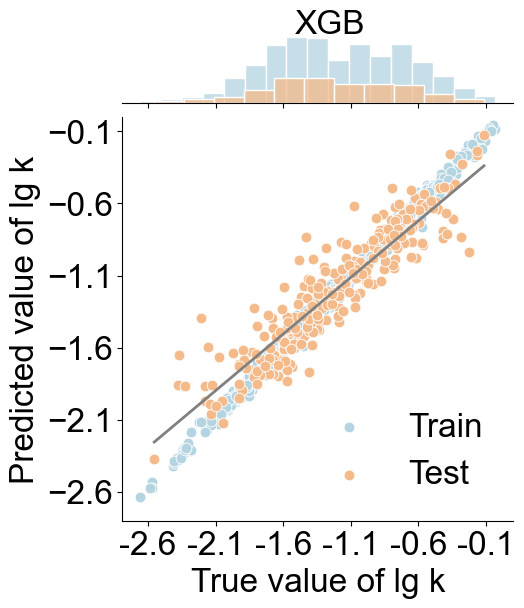

In [5]:
prediction(X=X,y=y,model=xgbr,title="XGB")

Train R2= 0.957
Train RMSE: 0.105
Test R2= 0.747
Test RMSE: 0.244


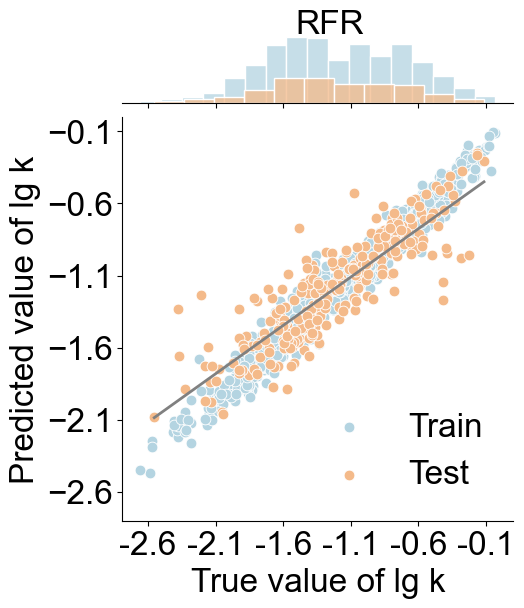

In [6]:
rfr = RFR(n_estimators=130,
           max_depth=18,
           min_samples_leaf=1,
           min_samples_split=2,
           max_features=2)
prediction(X=X,y=y,model=rfr,title="RFR")

Train R2= 0.821
Train RMSE: 0.215
Test R2= 0.658
Test RMSE: 0.283


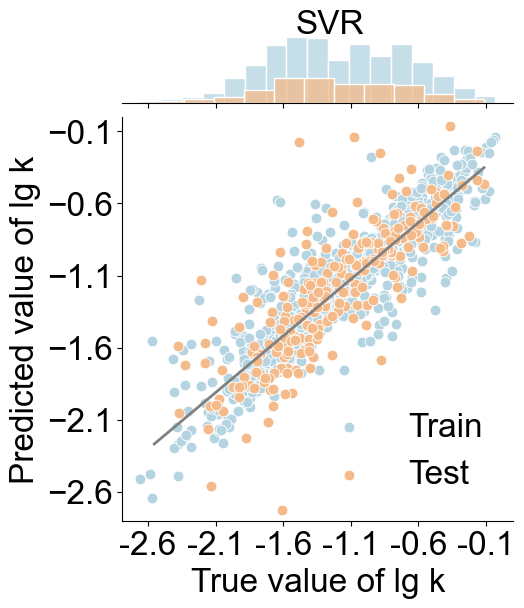

In [7]:
svr = SVR(C=850, epsilon=0.11, gamma=0.29)
prediction(X=X,y=y,model=svr,title="SVR")

Iteration 1, loss = 0.30255350
Iteration 2, loss = 0.14037427
Iteration 3, loss = 0.14865717
Iteration 4, loss = 0.12934443
Iteration 5, loss = 0.12915638
Iteration 6, loss = 0.12415485
Iteration 7, loss = 0.12334890
Iteration 8, loss = 0.12112719
Iteration 9, loss = 0.11972440
Iteration 10, loss = 0.11806537
Iteration 11, loss = 0.11630049
Iteration 12, loss = 0.11472322
Iteration 13, loss = 0.11309359
Iteration 14, loss = 0.11134107
Iteration 15, loss = 0.10957618
Iteration 16, loss = 0.10745126
Iteration 17, loss = 0.10562829
Iteration 18, loss = 0.10318338
Iteration 19, loss = 0.10122793
Iteration 20, loss = 0.09885645
Iteration 21, loss = 0.09633926
Iteration 22, loss = 0.09468374
Iteration 23, loss = 0.09303551
Iteration 24, loss = 0.09108803
Iteration 25, loss = 0.08820421
Iteration 26, loss = 0.08526439
Iteration 27, loss = 0.08501628
Iteration 28, loss = 0.08489399
Iteration 29, loss = 0.08228335
Iteration 30, loss = 0.08440709
Iteration 31, loss = 0.07809486
Iteration 32, los

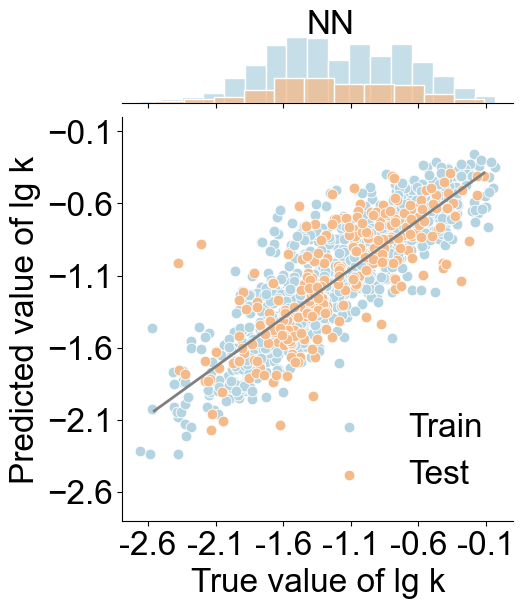

In [8]:
mplr = MPLR(hidden_layer_sizes=(90,90,90,90),
                        max_iter=230,
                         verbose=True)
prediction(X=X,y=y,model=mplr,title="NN")